0    65.367965
1    34.632035
Name: chd, dtype: float64
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Categorical variables are ['famhist']


<ipython-input-1-55d99dd0bb22>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


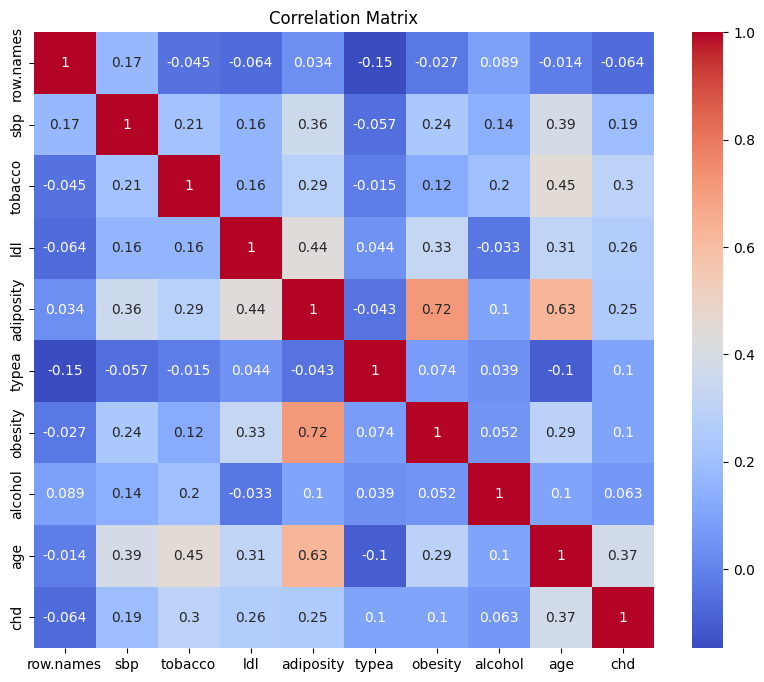

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
df = pd.read_csv(url)

# Percentage of each class 0 and 1
class_counts = df['chd'].value_counts(normalize=True)*100
print(class_counts)

# Missing values
print(df.isnull().sum())

# Categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'object']
print("Categorical variables are", categorical)

# Features that have maximum correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

By using numerical and visual Explaratory Data Analysis:

Percentage of class 0 is 65.37%

Percentage of class 1 is 34.63%

There are no missing values for any of the features and there is only 1 categorical variable which is famhist or family history and this was known just by looking at the data.

The features with maximum correlation would be obesity and adiposity and this makes sense as adiposity refers to body fat. Adiposity and age also have high correlation and this is probably due to individuals being less active as they get older and their body storing more fat.

In [ ]:
# get_dummies() to convert categorical columns to appropiate format
df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=False)
print(df_encoded.head())

   row.names  sbp  tobacco   ldl  adiposity  typea  obesity  alcohol  age  \
0          1  160    12.00  5.73      23.11     49    25.30    97.20   52   
1          2  144     0.01  4.41      28.61     55    28.87     2.06   63   
2          3  118     0.08  3.48      32.28     52    29.14     3.81   46   
3          4  170     7.50  6.41      38.03     51    31.99    24.26   58   
4          5  134    13.60  3.50      27.78     60    25.99    57.34   49   

   chd  famhist_Absent  famhist_Present  
0    1               0                1  
1    1               1                0  
2    0               0                1  
3    1               0                1  
4    1               0                1  


Here I used get_dummies() to create the famhist_Absent and famhist_Present columns where if family history absent is 0, family history present must be 1 and vice-versa.

In [ ]:
# Standardization Function
def standardization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data

standardized_data = standardization(df_encoded)
print(standardized_data.head())

   row.names       sbp   tobacco       ldl  adiposity     typea   obesity  \
0  -1.726055  1.058564  1.823073  0.478412  -0.295503 -0.418470 -0.176786   
1  -1.718581  0.277089 -0.790237 -0.159680   0.412140  0.193344  0.671373   
2  -1.711107 -0.992806 -0.774980 -0.609245   0.884332 -0.112563  0.735519   
3  -1.703633  1.546985  0.842264  0.807126   1.624141 -0.214532  1.412621   
4  -1.696158 -0.211332  2.171805 -0.599577   0.305351  0.703189 -0.012856   

    alcohol       age       chd  famhist_Absent  famhist_Present  
0  3.277738  0.629336  1.373863       -1.185854         1.185854  
1 -0.612745  1.383115  1.373863        0.843274        -0.843274  
2 -0.541183  0.218184 -0.727875       -1.185854         1.185854  
3  0.295062  1.040488  1.373863       -1.185854         1.185854  
4  1.647775  0.423760  1.373863       -1.185854         1.185854  


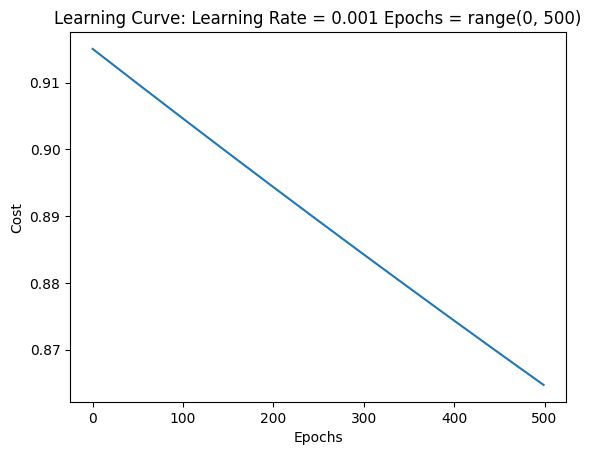

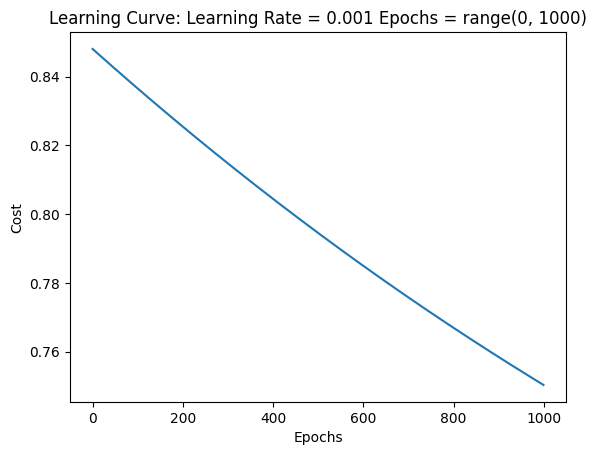

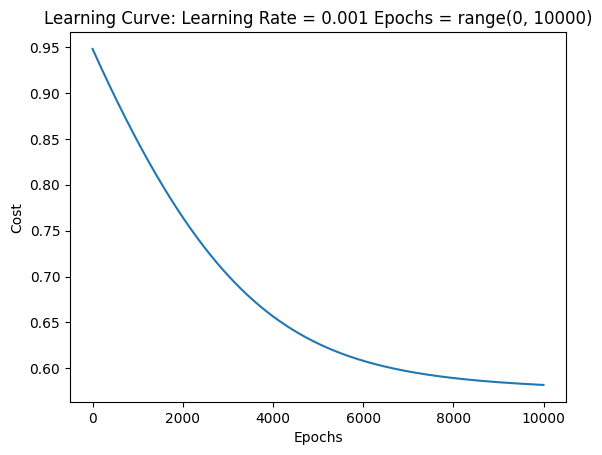

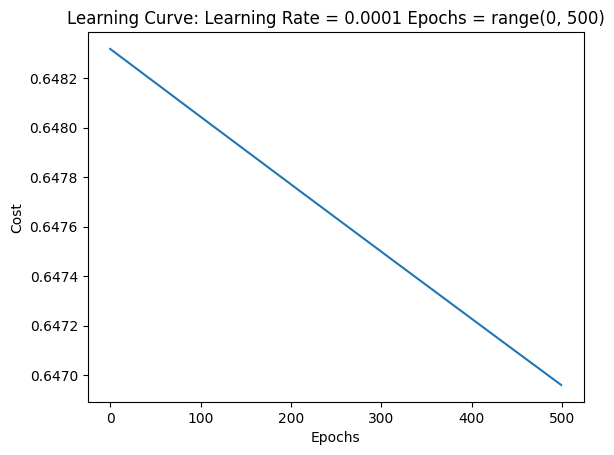

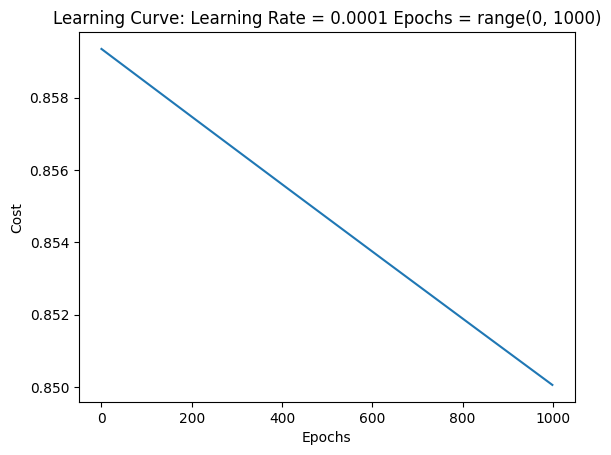

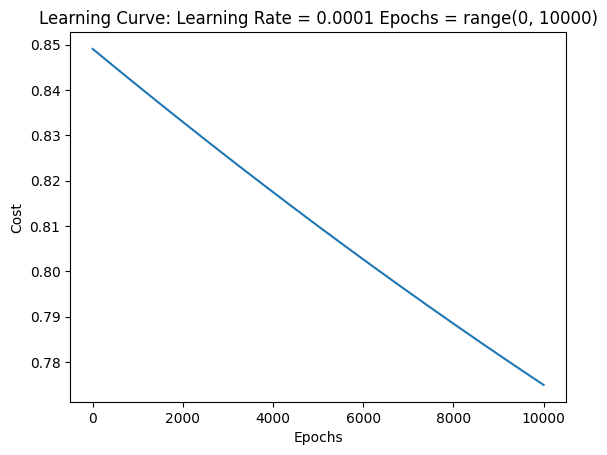

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_func(y, y_pred):
  m = len(y)
  epsilon = 1e-15
  cost = -1/m * np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
  return cost

def batch_gradient_descent(X, y, thetas, alpha):
    m = len(X)
    thetas += alpha * np.dot(X.T, (y - sigmoid(np.dot(X, thetas.T)))) / m
    return thetas

def initialize_random(num_features):
    return np.random.rand(num_features)

def logistic_regression(X, y, learning_rate, epochs):
    thetas = initialize_random(11)
    costs = []
    for epoch in range(epochs):
        thetas = batch_gradient_descent(X, y, thetas, learning_rate)
        predictions = sigmoid(np.dot(X, thetas))
        cost = cost_func(y, predictions)
        costs.append(cost)
    return costs, thetas

def plot_learning_curve(epochs, costs, learning_rate):
    plt.plot(epochs, costs)
    plt.title(f'Learning Curve: Learning Rate = {learning_rate} Epochs = {epochs}')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.show()

learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

df_encoded = pd.get_dummies(df, columns=['famhist'], drop_first=False)
X = standardization(df_encoded.drop('chd', axis=1).values)
y = df_encoded['chd'].values

for learning_rate in learning_rates:
    for epochs in epochs_list:
        costs, thetas = logistic_regression(X, y, learning_rate, epochs)
        plot_learning_curve(range(epochs), costs, learning_rate)


Sigmoid function is defined as well as the cost function, note that epsilon is added when taking the log of h(x) as if the predicted value is 0, the result would be negative infinty.

It seems that with a learning rate of 0.001 after around 8000 epochs the cost does not decrease significantly. But with the smaller learning rate of 0.0001, all three plots look the same as the learning curve is linear and will probably require more epochs to stabilize.

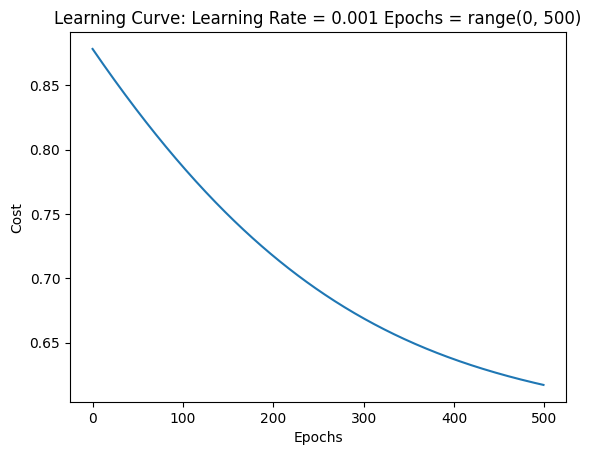

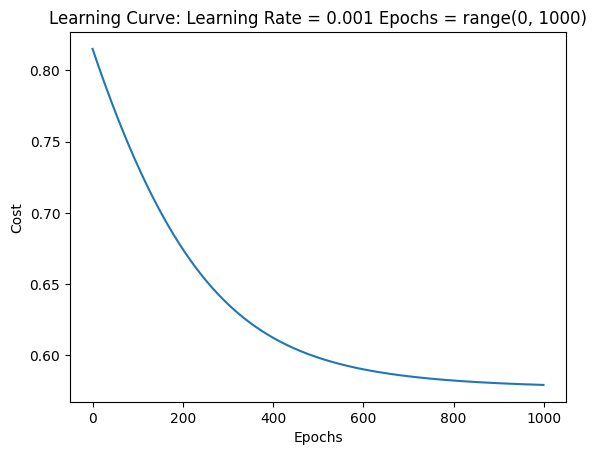

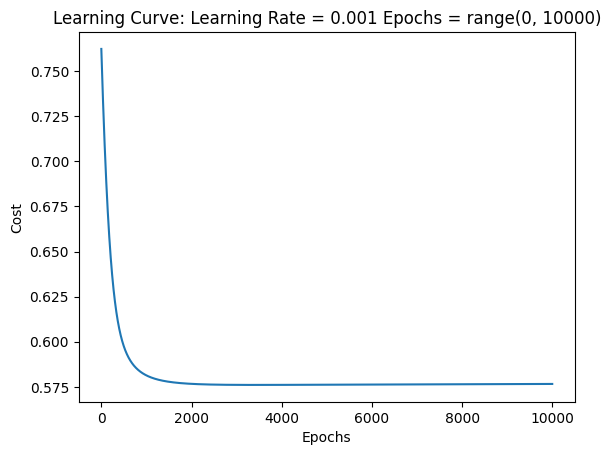

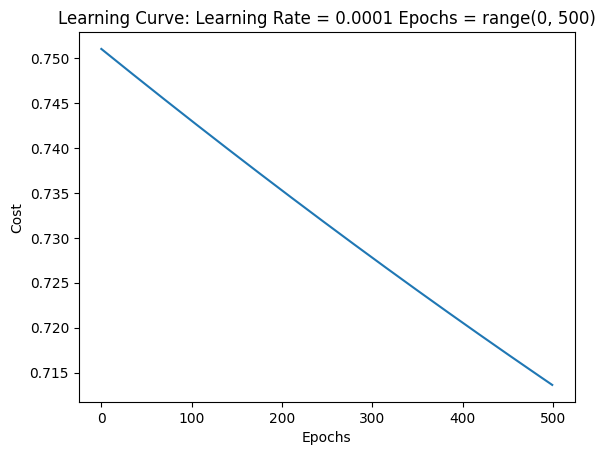

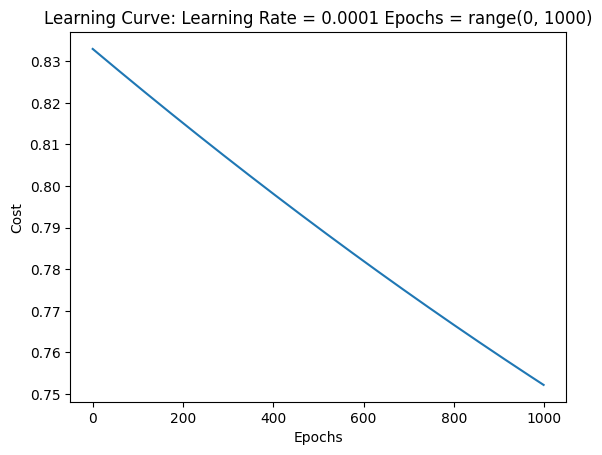

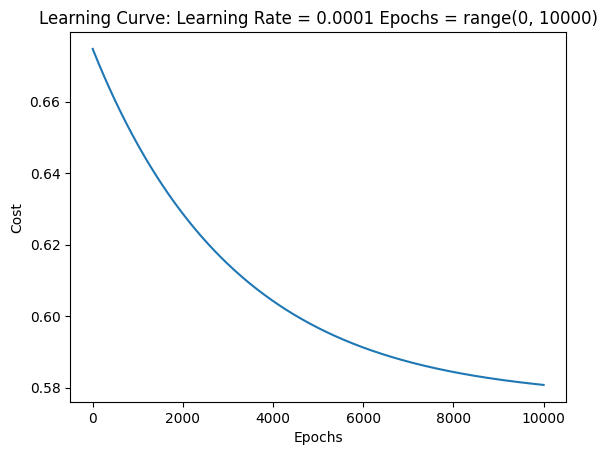

In [ ]:
def batch_gradient_descent(X, y, thetas, alpha):
    m = len(X)
    thetas += alpha * np.dot(X.T, (y - sigmoid(np.dot(X, thetas.T)))) / m
    return thetas

def logistic_regression_mini_batch(X, y, learning_rate, epochs):
    thetas = initialize_random(11)
    costs = []

    m=len(X)
    batches = (m // 50) + 1         # // is the floor divison operator, returns only integer
    for epoch in range(epochs):
        for i in range(batches):
          start = i * 50
          end = min(start + 50, m)
          X_batch = X[start:end]
          y_batch = y[start:end]

          thetas = batch_gradient_descent(X_batch, y_batch, thetas, learning_rate)

        predictions = sigmoid(np.dot(X, thetas))
        cost = cost_func(y, predictions)
        costs.append(cost)

    return costs, thetas

learning_rates = [0.001, 0.0001]
epochs_list = [500, 1000, 10000]

for learning_rate in learning_rates:
    for epochs in epochs_list:
        costs, thetas = logistic_regression_mini_batch(X, y, learning_rate, epochs)
        plot_learning_curve(range(epochs), costs, learning_rate)

With a learning rate of 0.001 using mini-batch gradient descent, it seems after around 800 epochs does the cost function not decrease significantly anymore. However with the learning rate of 0.0001 it looks like it takes around 8000 epochs for the cost function not to decrease significantly anymore and this is probably due to the smaller learning rate as it will require more epochs.

It is also worth mentioning that the mini-batch gradient looks to be the better option as with both learning rates it required less epochs for the cost function to stabilize compared to batch gradient descent.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_lr = df_encoded.drop('chd', axis=1).values
y_lr = df_encoded['chd'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lr)     # Standardize data

log_reg_model = LogisticRegression()      # Using logistic regression model
log_reg_model.fit(X_scaled, y_lr)         # Training based on data

sklearn_thetas = log_reg_model.coef_[0]  # Coefficients learned by Logistic Regression

print("My resulting coefficients:", thetas)
print("LogisticRegression implementation coefficients:", sklearn_thetas)

My resulting coefficients: [-0.16149613  0.14171154  0.27526365  0.30398703  0.13435316  0.1590688
 -0.18859053  0.16322474  0.35152184  0.11076736  0.50345875]
LogisticRegression implementation coefficients: [-0.11751487  0.1565205   0.3550536   0.34730495  0.15981931  0.36081695
 -0.26895449  0.01037362  0.63236301 -0.22991381  0.22991381]


When comparing my resulting coefficients with the results from Python's sklearn logistic regression, it can be seen that the coefficients are closely similar as most coefficients are within several hundredths of a decimal with the exception of a few validating my results.

The difference could also be due to randomly intializing the theta coefficients between 0 to 1 using the random function in my implementation.